In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import Imputer

# Join data

In [203]:
df = pd.read_csv('C:\\Users\\Buster\\Documents\\MSc\\Project\\Flask_App_WPB\\wpb-flask\\Modelling\\countries.csv', encoding='latin-1')

In [204]:
df.head()

,WPBname,name,id,geo_id,region_id,colour,region,CIAname,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line
0,Andorra,Andorra,1,AD,6,DC143C,Europe,Andorra,85708.000,49900.000,32.000,82.900,3.200,100.000,3.700,8.100,nan
1,United Arab Emirates,United Arab Emirates,2,AE,1,FFAEB9,Asia,United Arab Emirates,9701315.000,68600.000,13.000,78.700,nan,93.800,1.600,3.600,19.500
2,Afghanistan,Afghanistan,3,AF,1,CD8C95,Asia,Afghanistan,34940837.000,2000.000,209.000,52.100,3.900,38.200,23.900,8.200,54.500
3,Antigua and Barbuda,Antigua and Barbuda,4,AG,8,8B5F65,Northern America,Antigua And Barbuda,95882.000,26400.000,78.000,76.900,2.500,99.000,11.000,5.500,nan
4,Anguilla (United Kingdom),Anguilla,5,AI,8,FFC0CB,Northern America,Anguilla,17422.000,12200.000,130.000,81.600,nan,nan,8.000,nan,23.000


In [205]:
df['countryref_id'] = df['id']

In [206]:
df.shape

(222, 18)

In [207]:

df_data = pd.read_csv(r'C:\Users\Buster\Documents\MSc\Project\Flask_App_WPB\wpb-flask\Modelling\\country_datas.csv', encoding='latin-1')

df_data.tail()

,id,countryref_id,country,metric_id,metric,year,value,exp_value
4669,4792,222,Zimbabwe,2,Prison population Rate,2008,103.000,nan
4670,4793,222,Zimbabwe,2,Prison population Rate,2010,96.000,nan
4671,4794,222,Zimbabwe,2,Prison population Rate,2012,115.000,nan
4672,4795,222,Zimbabwe,2,Prison population Rate,2014,115.000,nan
4673,4796,222,Zimbabwe,2,Prison population Rate,2017,120.000,nan


In [208]:
df_data.shape

(4674, 8)

In [209]:
all_metrics = df_data.merge(df, on = 'countryref_id', how = 'left')

In [210]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
all_metrics.describe()

,id_x,countryref_id,metric_id,year,value,exp_value,id_y,region_id,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line
count,4674.00,4674.00,4674.00,4674.00,4595.00,0.00,4674.00,4674.00,4578.00,4572.00,4572.00,4548.00,3662.00,3446.00,4418.00,4070.00,3658.00
mean,2387.23,111.02,2.07,2011.12,20204.55,nan,111.02,4.36,36698003.31,24414.00,110.24,73.65,4.67,85.73,10.29,6.88,26.51
std,1382.34,63.73,1.35,6.71,131315.14,nan,63.73,2.90,141258526.79,24993.22,63.93,7.43,1.81,17.69,10.09,2.72,17.13
min,1.00,1.00,1.00,1993.00,0.00,nan,1.00,1.00,9038.00,700.00,1.00,52.10,0.80,19.10,0.30,1.50,0.20
25%,1191.25,57.00,1.00,2006.00,73.00,nan,57.00,2.00,740685.00,6300.00,55.00,68.90,3.50,78.40,4.20,5.00,14.90
50%,2378.50,112.00,2.00,2012.00,194.00,nan,112.00,3.00,6312212.00,15200.00,109.00,75.40,4.50,94.40,7.00,6.50,22.40
75%,3588.75,164.00,2.00,2019.00,3725.00,nan,164.00,6.00,25640965.00,36400.00,163.00,78.90,5.50,98.50,12.20,8.60,35.00
max,4796.00,222.00,6.00,2019.00,2307504.00,nan,222.00,9.00,1384688986.00,139100.00,228.00,89.40,12.80,100.00,77.00,17.10,82.50


In [211]:
all_metrics.shape

(4674, 25)

In [212]:
print(all_metrics.dtypes)

id_x                            int64
countryref_id                   int64
country                        object
metric_id                       int64
metric                         object
year                            int64
value                         float64
exp_value                     float64
WPBname                        object
name                           object
id_y                            int64
geo_id                         object
region_id                       int64
colour                         object
region                         object
CIAname                        object
population                    float64
gdp                           float64
gdp_rank                      float64
life_expectancy               float64
edu_expenditure_pct_gdp       float64
literacy                      float64
unemployment                  float64
health_expenditure_pct_gdp    float64
pct_poverty_line              float64
dtype: object


In [213]:
all_metrics


,id_x,countryref_id,country,metric_id,metric,year,value,exp_value,WPBname,name,...,CIAname,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line
0,1,160,Papua New Guinea,1,Prison Population Total,2019,5087.00,nan,Papua New Guinea,Papua New Guinea,...,Papua New Guinea,7027332.00,3700.00,184.00,67.50,nan,64.20,2.50,4.30,37.00
1,2,181,Slovakia,1,Prison Population Total,2019,10372.00,nan,Slovakia,Slovakia,...,Slovakia,5445040.00,33100.00,61.00,77.40,4.60,nan,8.10,8.10,12.30
2,3,104,Kyrgyzstan,1,Prison Population Total,2019,10574.00,nan,Kyrgyzstan,Kyrgyzstan,...,Kyrgyzstan,5849296.00,3700.00,183.00,71.20,7.20,99.50,7.10,6.50,32.10
3,4,113,Kazakhstan,1,Prison Population Total,2019,31001.00,nan,Kazakhstan,Kazakhstan,...,Kazakhstan,18744548.00,26300.00,79.00,71.40,2.90,99.80,5.00,4.40,2.60
4,5,43,Colombia,1,Prison Population Total,2019,119896.00,nan,Colombia,Colombia,...,Colombia,48168996.00,14400.00,116.00,76.20,4.40,94.70,9.30,7.20,28.00
5,6,125,Morocco,1,Prison Population Total,2019,82512.00,nan,Morocco,Morocco,...,Morocco,34314130.00,8600.00,147.00,77.30,5.30,68.50,10.20,5.90,15.00
6,7,68,United Kingdom: England & Wales,1,Prison Population Total,2019,82543.00,nan,United Kingdom: England & Wales,United Kingdom,...,United Kingdom,65105246.00,44300.00,39.00,80.90,5.50,nan,4.40,9.10,15.00
7,8,172,Russian Federation,1,Prison Population Total,2019,557584.00,nan,Russian Federation,Russian Federation,...,Russia,142122776.00,27900.00,74.00,71.30,3.80,99.70,5.20,7.10,13.30
8,9,163,Poland,1,Prison Population Total,2019,73520.00,nan,Poland,Poland,...,Poland,38420687.00,29600.00,69.00,77.90,4.80,99.80,4.90,6.40,17.60
9,10,90,Indonesia,1,Prison Population Total,2019,258501.00,nan,Indonesia,Indonesia,...,Indonesia,262787403.00,12400.00,127.00,73.20,3.60,95.40,5.40,2.80,10.90


In [214]:
all_metrics.isna().sum()

id_x                             0
countryref_id                    0
country                          0
metric_id                        0
metric                           0
year                             0
value                           79
exp_value                     4674
WPBname                          0
name                             0
id_y                             0
geo_id                          20
region_id                        0
colour                           0
region                           0
CIAname                         96
population                      96
gdp                            102
gdp_rank                       102
life_expectancy                126
edu_expenditure_pct_gdp       1012
literacy                      1228
unemployment                   256
health_expenditure_pct_gdp     604
pct_poverty_line              1016
dtype: int64

In [215]:
#Relevant columns
#not including value, population or gdp-rank
columns = ['gdp','life_expectancy', 'edu_expenditure_pct_gdp', 'literacy',
       'unemployment', 'health_expenditure_pct_gdp', 'pct_poverty_line']

In [216]:
#high number of NA's : replace with the mean so that we can still use them in our model- mean is used as there are too many floats to use a median:

imp = Imputer(strategy='mean', axis=0)
all_metrics[columns] = imp.fit_transform(all_metrics[columns])

In [217]:
#all_metrics[all_metrics['CIAname'].isna()==True]

In [218]:
all_metrics = all_metrics[all_metrics['CIAname'].isna()==False]

In [440]:
#gdp is quite a lot larger than the others so we can log normalise it
all_metrics['gdp'] = np.log(all_metrics['gdp'])

C:\Users\Buster\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [219]:
all_metrics.shape

(4578, 25)

# Descriptive Statistics

In [220]:
#separate dfs for each of the metrics

ppt = all_metrics[all_metrics.metric_id ==1]
ppt = ppt[ppt.value.notna()]

ppr = all_metrics[all_metrics.metric_id ==2]
ppr = ppr[ppr.value.notna()]

remand = all_metrics[all_metrics.metric_id ==3]
remand = remand[remand.value.notna()]

fem = all_metrics[all_metrics.metric_id ==4]
fem = fem[fem.value.notna()]

foreign = all_metrics[all_metrics.metric_id ==5]
foreign = foreign[foreign.value.notna()]

occ = all_metrics[all_metrics.metric_id ==6]
occ = occ[occ.value.notna()]

In [264]:

ppt.describe()

,id_x,countryref_id,metric_id,year,value,exp_value,id_y,region_id,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line,population_log
count,1850.000,1850.000,1850.000,1850.000,1850.000,0.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000
mean,1962.710,110.036,1.000,2009.253,49971.306,nan,110.036,4.378,37276854.196,24630.865,109.237,73.782,4.683,85.961,10.221,6.900,26.220,15.230
std,817.932,63.639,0.000,6.122,203369.899,nan,63.639,2.893,143212432.143,25007.605,63.430,7.337,1.608,15.079,9.873,2.550,15.216,2.464
min,1.000,1.000,1.000,1993.000,3.000,nan,1.000,1.000,9038.000,700.000,1.000,52.100,0.800,19.100,0.300,1.500,0.200,9.109
25%,1612.250,56.000,1.000,2004.000,997.750,nan,56.000,2.000,740685.000,6800.000,55.000,69.600,3.800,85.500,4.200,5.200,16.200,13.515
50%,2085.500,111.000,1.000,2010.000,7572.500,nan,111.000,3.000,6312212.000,15600.000,108.000,75.400,4.674,85.726,7.100,6.877,26.300,15.658
75%,2579.750,163.000,1.000,2014.000,27402.250,nan,163.000,6.000,25640965.000,36400.000,161.000,78.900,5.300,97.100,11.800,8.200,29.600,17.060
max,3076.000,222.000,1.000,2019.000,2307504.000,nan,222.000,9.000,1384688986.000,139100.000,228.000,89.400,12.800,100.000,77.000,17.100,82.500,21.049


In [262]:
remand.describe()

,id_x,countryref_id,metric_id,year,value,exp_value,id_y,region_id,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line
count,209.000,209.000,209.000,209.000,209.000,0.000,209.000,209.000,209.000,209.000,209.000,209.000,209.000,209.000,209.000,209.000,209.000
mean,563.440,111.603,3.000,2019.000,32.719,nan,111.603,4.263,28985860.368,23911.962,113.421,73.305,4.585,84.540,10.668,6.788,27.780
std,64.636,64.612,0.000,0.000,19.480,nan,64.612,2.881,98857079.201,25322.639,66.085,7.629,1.611,16.600,10.201,2.578,15.775
min,453.000,1.000,3.000,2019.000,0.000,nan,1.000,1.000,9038.000,700.000,1.000,52.100,0.800,19.100,0.300,1.500,0.200
25%,509.000,56.000,3.000,2019.000,16.800,nan,56.000,2.000,740685.000,5600.000,55.000,68.400,3.800,81.900,4.400,5.100,17.100
50%,562.000,112.000,3.000,2019.000,29.000,nan,112.000,3.000,6187271.000,14900.000,114.000,75.100,4.674,85.726,7.900,6.877,26.511
75%,618.000,167.000,3.000,2019.000,45.500,nan,167.000,6.000,23545963.000,36400.000,170.000,78.900,5.200,96.900,12.200,8.100,31.500
max,677.000,222.000,3.000,2019.000,90.000,nan,222.000,9.000,1296834042.000,139100.000,228.000,89.400,12.500,100.000,77.000,17.100,82.500


In [260]:
fem.describe()

,id_x,countryref_id,metric_id,year,value,exp_value,id_y,region_id,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line
count,213.000,213.000,213.000,213.000,213.000,0.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000
mean,789.906,110.526,4.000,2019.000,5.205,nan,110.526,4.244,34810884.577,23931.925,112.798,73.286,4.589,84.557,10.584,6.791,27.666
std,64.384,64.157,0.000,0.000,3.346,nan,64.157,2.894,135051955.021,25100.408,65.604,7.585,1.600,16.532,10.136,2.616,15.789
min,679.000,1.000,4.000,2019.000,0.000,nan,1.000,1.000,9038.000,700.000,1.000,52.100,0.800,19.100,0.300,1.500,0.200
25%,736.000,55.000,4.000,2019.000,3.000,nan,55.000,2.000,660121.000,5700.000,55.000,68.400,3.800,81.900,4.400,5.100,17.000
50%,789.000,111.000,4.000,2019.000,4.500,nan,111.000,3.000,6085213.000,15000.000,112.000,75.100,4.674,85.726,7.900,6.877,26.511
75%,845.000,165.000,4.000,2019.000,6.700,nan,165.000,6.000,23470145.000,36400.000,169.000,78.700,5.200,96.600,12.000,8.100,31.500
max,903.000,222.000,4.000,2019.000,20.500,nan,222.000,9.000,1384688986.000,139100.000,228.000,89.400,12.500,100.000,77.000,17.100,82.500


In [263]:
foreign.describe()

,id_x,countryref_id,metric_id,year,value,exp_value,id_y,region_id,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line
count,185.000,185.000,185.000,185.000,185.000,0.000,185.000,185.000,185.000,185.000,185.000,185.000,185.000,185.000,185.000,185.000,185.000
mean,1011.335,113.259,5.000,2019.000,13.772,nan,113.259,4.232,37866612.573,25282.162,108.741,73.829,4.622,86.202,9.981,6.827,26.995
std,65.029,64.582,0.000,0.000,20.072,nan,64.582,2.866,144375153.845,26054.985,64.746,7.329,1.515,14.764,9.792,2.514,15.693
min,905.000,1.000,5.000,2019.000,0.000,nan,1.000,1.000,9038.000,700.000,1.000,52.100,0.800,22.300,0.300,1.500,0.200
25%,956.000,58.000,5.000,2019.000,1.400,nan,58.000,2.000,766397.000,6000.000,53.000,69.600,3.800,85.600,4.200,5.200,16.600
50%,1005.000,115.000,5.000,2019.000,4.900,nan,115.000,3.000,6187271.000,15200.000,109.000,75.400,4.674,86.500,7.000,6.877,26.511
75%,1070.000,170.000,5.000,2019.000,18.000,nan,170.000,6.000,25640965.000,37200.000,164.000,78.900,5.300,97.500,11.300,8.200,30.000
max,1129.000,222.000,5.000,2019.000,96.900,nan,222.000,9.000,1384688986.000,139100.000,227.000,89.400,10.300,100.000,77.000,17.100,82.500


In [221]:
occ.describe()


,id_x,countryref_id,metric_id,year,value,exp_value,id_y,region_id,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line
count,197.00,197.00,197.00,197.00,197.00,0.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00,197.00
mean,1239.75,111.05,6.00,2019.00,127.50,nan,111.05,4.43,28270340.34,24127.92,111.01,73.71,4.64,85.27,10.44,6.94,27.05
std,64.51,63.87,0.00,0.00,67.84,nan,63.87,2.89,101277443.25,24537.54,64.61,7.47,1.58,15.94,10.16,2.50,15.39
min,1131.00,1.00,6.00,2019.00,14.00,nan,1.00,1.00,9038.00,700.00,1.00,52.10,0.80,19.10,0.30,1.50,0.20
25%,1185.00,56.00,6.00,2019.00,82.80,nan,56.00,2.00,605764.00,5900.00,55.00,69.10,3.80,85.50,4.40,5.40,16.70
50%,1237.00,112.00,6.00,2019.00,110.20,nan,112.00,4.00,6085213.00,15100.00,110.00,75.30,4.67,85.73,7.10,6.88,26.51
75%,1295.00,164.00,6.00,2019.00,153.00,nan,164.00,6.00,21457116.00,36400.00,166.00,78.90,5.20,97.10,11.90,8.20,30.50
max,1355.00,222.00,6.00,2019.00,463.60,nan,222.00,9.00,1296834042.00,139100.00,227.00,89.40,12.50,100.00,77.00,17.10,82.50


In [222]:
ppr.describe()

,id_x,countryref_id,metric_id,year,value,exp_value,id_y,region_id,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line
count,1849.00,1849.00,1849.00,1849.00,1849.00,0.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00,1849.00
mean,3510.81,110.00,2.00,2009.25,174.00,nan,110.00,4.38,37296996.48,24612.28,109.29,73.78,4.68,85.96,10.22,6.90,26.22
std,1239.53,63.63,0.00,6.12,133.51,nan,63.63,2.89,143248553.66,25001.58,63.41,7.34,1.61,15.08,9.88,2.55,15.22
min,227.00,1.00,2.00,1993.00,10.00,nan,1.00,1.00,9038.00,700.00,1.00,52.10,0.80,19.10,0.30,1.50,0.20
25%,3333.00,56.00,2.00,2004.00,78.00,nan,56.00,2.00,740685.00,6800.00,55.00,69.60,3.80,85.50,4.20,5.20,16.20
50%,3806.00,111.00,2.00,2010.00,131.00,nan,111.00,3.00,6312212.00,15600.00,108.00,75.40,4.67,85.73,7.10,6.88,26.30
75%,4300.00,163.00,2.00,2014.00,232.00,nan,163.00,6.00,25640965.00,36400.00,161.00,78.90,5.30,97.10,11.80,8.20,29.60
max,4796.00,222.00,2.00,2019.00,837.00,nan,222.00,9.00,1384688986.00,139100.00,228.00,89.40,12.80,100.00,77.00,17.10,82.50


C:\Users\Buster\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


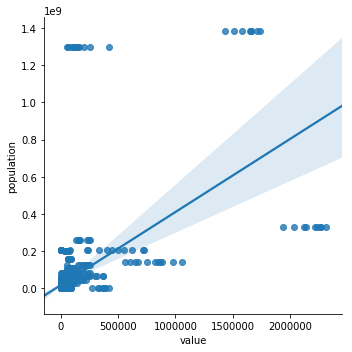

In [223]:
sns.lmplot('value', 'population', data=ppt)
plt.show()

C:\Users\Buster\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [402]:

ppt['population_log'] = np.log(ppt['population'])

C:\Users\Buster\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


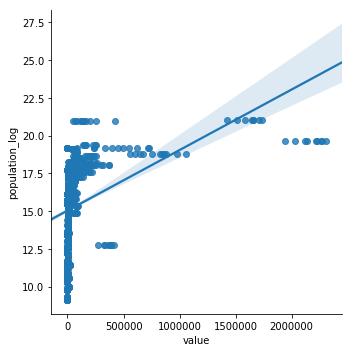

In [403]:
sns.lmplot('value', 'population_log', data=ppt)
plt.show()

C:\Users\Buster\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


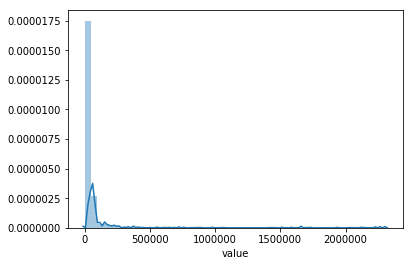

In [404]:
sns.distplot(ppt['value'])

In [405]:
 pd.set_option('display.float_format', lambda x: '%.3f' % x)
ppt.describe()

,id_x,countryref_id,metric_id,year,value,exp_value,id_y,region_id,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line,population_log
count,1850.000,1850.000,1850.000,1850.000,1850.000,0.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000,1850.000
mean,1962.710,110.036,1.000,2009.253,49971.306,nan,110.036,4.378,37276854.196,24630.865,109.237,73.782,4.683,85.961,10.221,6.900,26.220,15.230
std,817.932,63.639,0.000,6.122,203369.899,nan,63.639,2.893,143212432.143,25007.605,63.430,7.337,1.608,15.079,9.873,2.550,15.216,2.464
min,1.000,1.000,1.000,1993.000,3.000,nan,1.000,1.000,9038.000,700.000,1.000,52.100,0.800,19.100,0.300,1.500,0.200,9.109
25%,1612.250,56.000,1.000,2004.000,997.750,nan,56.000,2.000,740685.000,6800.000,55.000,69.600,3.800,85.500,4.200,5.200,16.200,13.515
50%,2085.500,111.000,1.000,2010.000,7572.500,nan,111.000,3.000,6312212.000,15600.000,108.000,75.400,4.674,85.726,7.100,6.877,26.300,15.658
75%,2579.750,163.000,1.000,2014.000,27402.250,nan,163.000,6.000,25640965.000,36400.000,161.000,78.900,5.300,97.100,11.800,8.200,29.600,17.060
max,3076.000,222.000,1.000,2019.000,2307504.000,nan,222.000,9.000,1384688986.000,139100.000,228.000,89.400,12.800,100.000,77.000,17.100,82.500,21.049


In [406]:
ppt.value.median()

7572.5

In [407]:
ppr

,id_x,countryref_id,country,metric_id,metric,year,value,exp_value,WPBname,name,...,CIAname,population,gdp,gdp_rank,life_expectancy,edu_expenditure_pct_gdp,literacy,unemployment,health_expenditure_pct_gdp,pct_poverty_line
222,227,160,Papua New Guinea,2,Prison Population Rate,2019,62.000,nan,Papua New Guinea,Papua New Guinea,...,Papua New Guinea,7027332.000,3700.000,184.000,67.500,4.674,64.200,2.500,4.300,37.000
223,228,181,Slovakia,2,Prison Population Rate,2019,190.000,nan,Slovakia,Slovakia,...,Slovakia,5445040.000,33100.000,61.000,77.400,4.600,85.726,8.100,8.100,12.300
224,229,104,Kyrgyzstan,2,Prison Population Rate,2019,178.000,nan,Kyrgyzstan,Kyrgyzstan,...,Kyrgyzstan,5849296.000,3700.000,183.000,71.200,7.200,99.500,7.100,6.500,32.100
225,230,113,Kazakhstan,2,Prison Population Rate,2019,168.000,nan,Kazakhstan,Kazakhstan,...,Kazakhstan,18744548.000,26300.000,79.000,71.400,2.900,99.800,5.000,4.400,2.600
226,231,43,Colombia,2,Prison Population Rate,2019,241.000,nan,Colombia,Colombia,...,Colombia,48168996.000,14400.000,116.000,76.200,4.400,94.700,9.300,7.200,28.000
227,232,125,Morocco,2,Prison Population Rate,2019,232.000,nan,Morocco,Morocco,...,Morocco,34314130.000,8600.000,147.000,77.300,5.300,68.500,10.200,5.900,15.000
228,233,68,United Kingdom: England & Wales,2,Prison Population Rate,2019,139.000,nan,United Kingdom: England & Wales,United Kingdom,...,United Kingdom,65105246.000,44300.000,39.000,80.900,5.500,85.726,4.400,9.100,15.000
229,234,172,Russian Federation,2,Prison Population Rate,2019,385.000,nan,Russian Federation,Russian Federation,...,Russia,142122776.000,27900.000,74.000,71.300,3.800,99.700,5.200,7.100,13.300
230,235,163,Poland,2,Prison Population Rate,2019,194.000,nan,Poland,Poland,...,Poland,38420687.000,29600.000,69.000,77.900,4.800,99.800,4.900,6.400,17.600
231,236,90,Indonesia,2,Prison Population Rate,2019,96.000,nan,Indonesia,Indonesia,...,Indonesia,262787403.000,12400.000,127.000,73.200,3.600,95.400,5.400,2.800,10.900


In [408]:
#Relevant columns
#including value
columns = ['value','gdp','life_expectancy', 'edu_expenditure_pct_gdp', 'literacy',
       'unemployment', 'health_expenditure_pct_gdp', 'pct_poverty_line']

In [409]:
metrics = [ppt, ppr, remand, fem, foreign, occ]

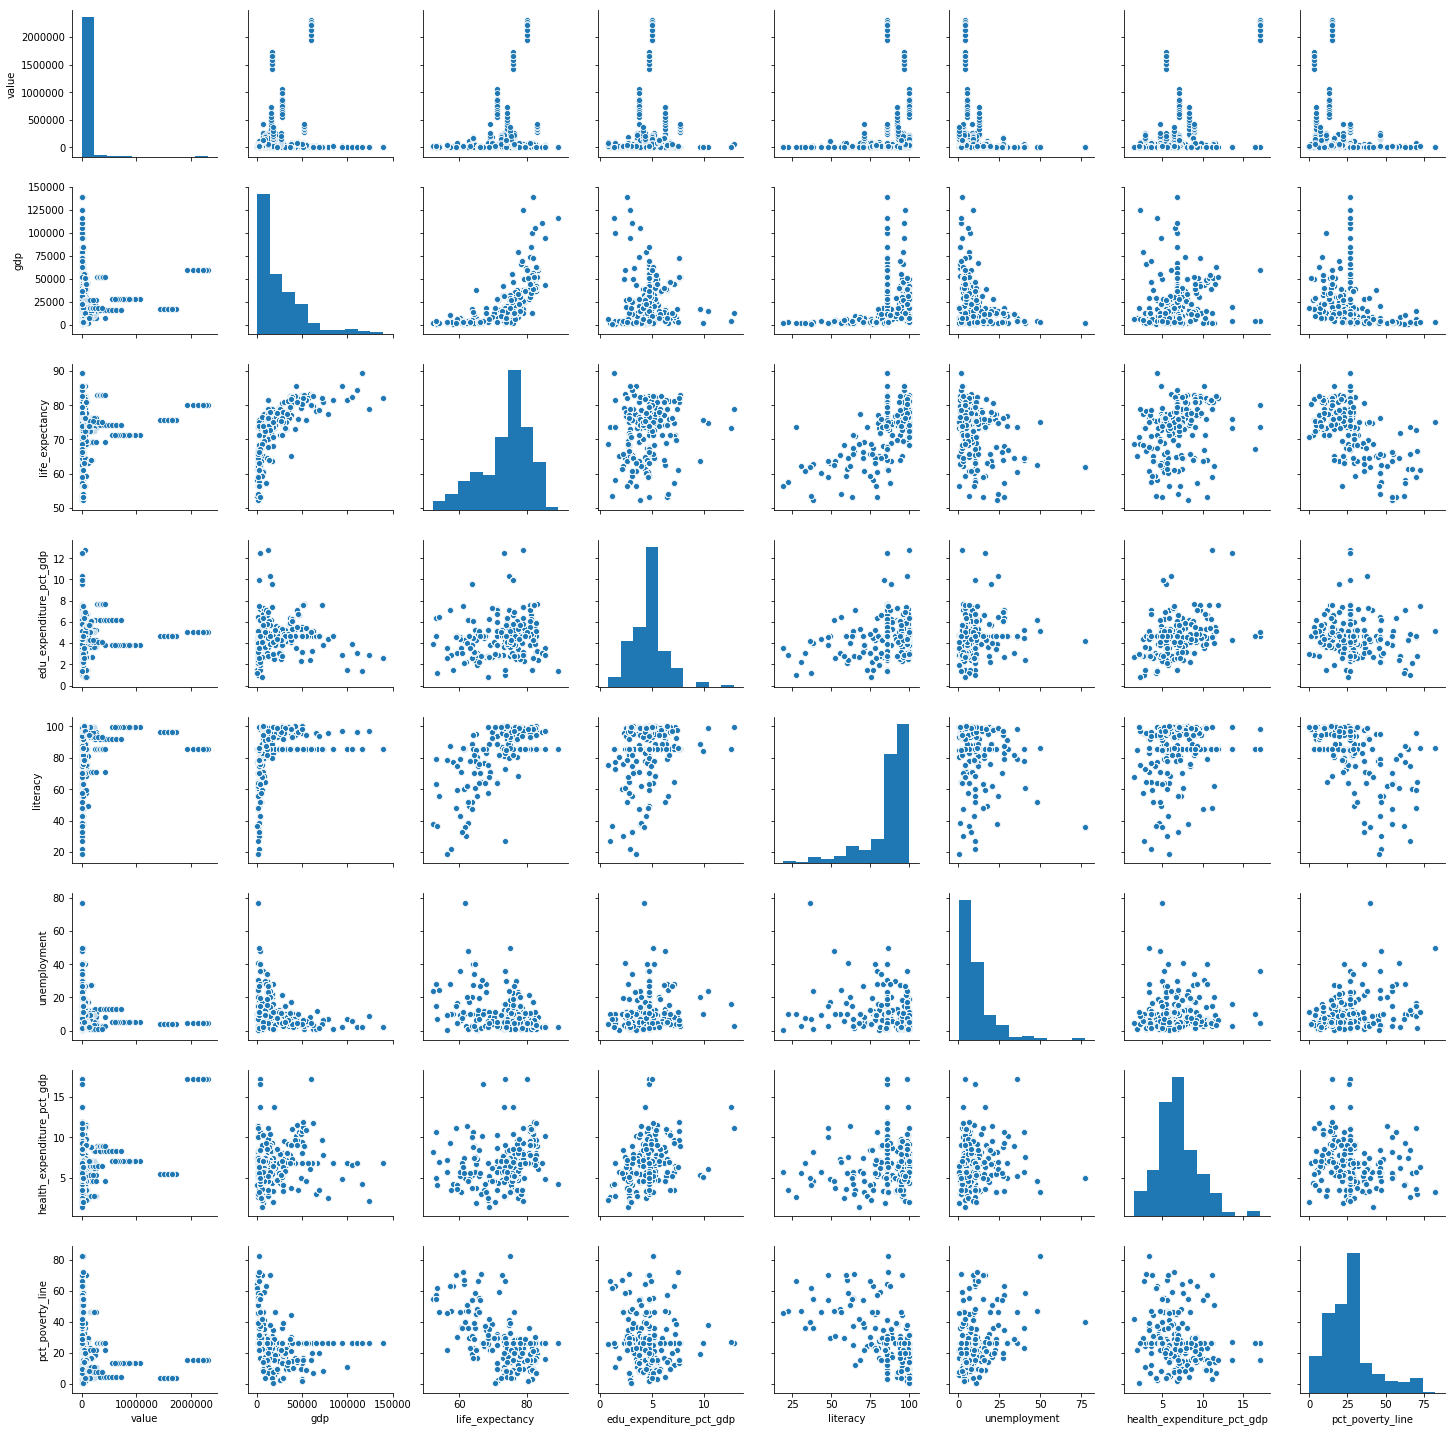

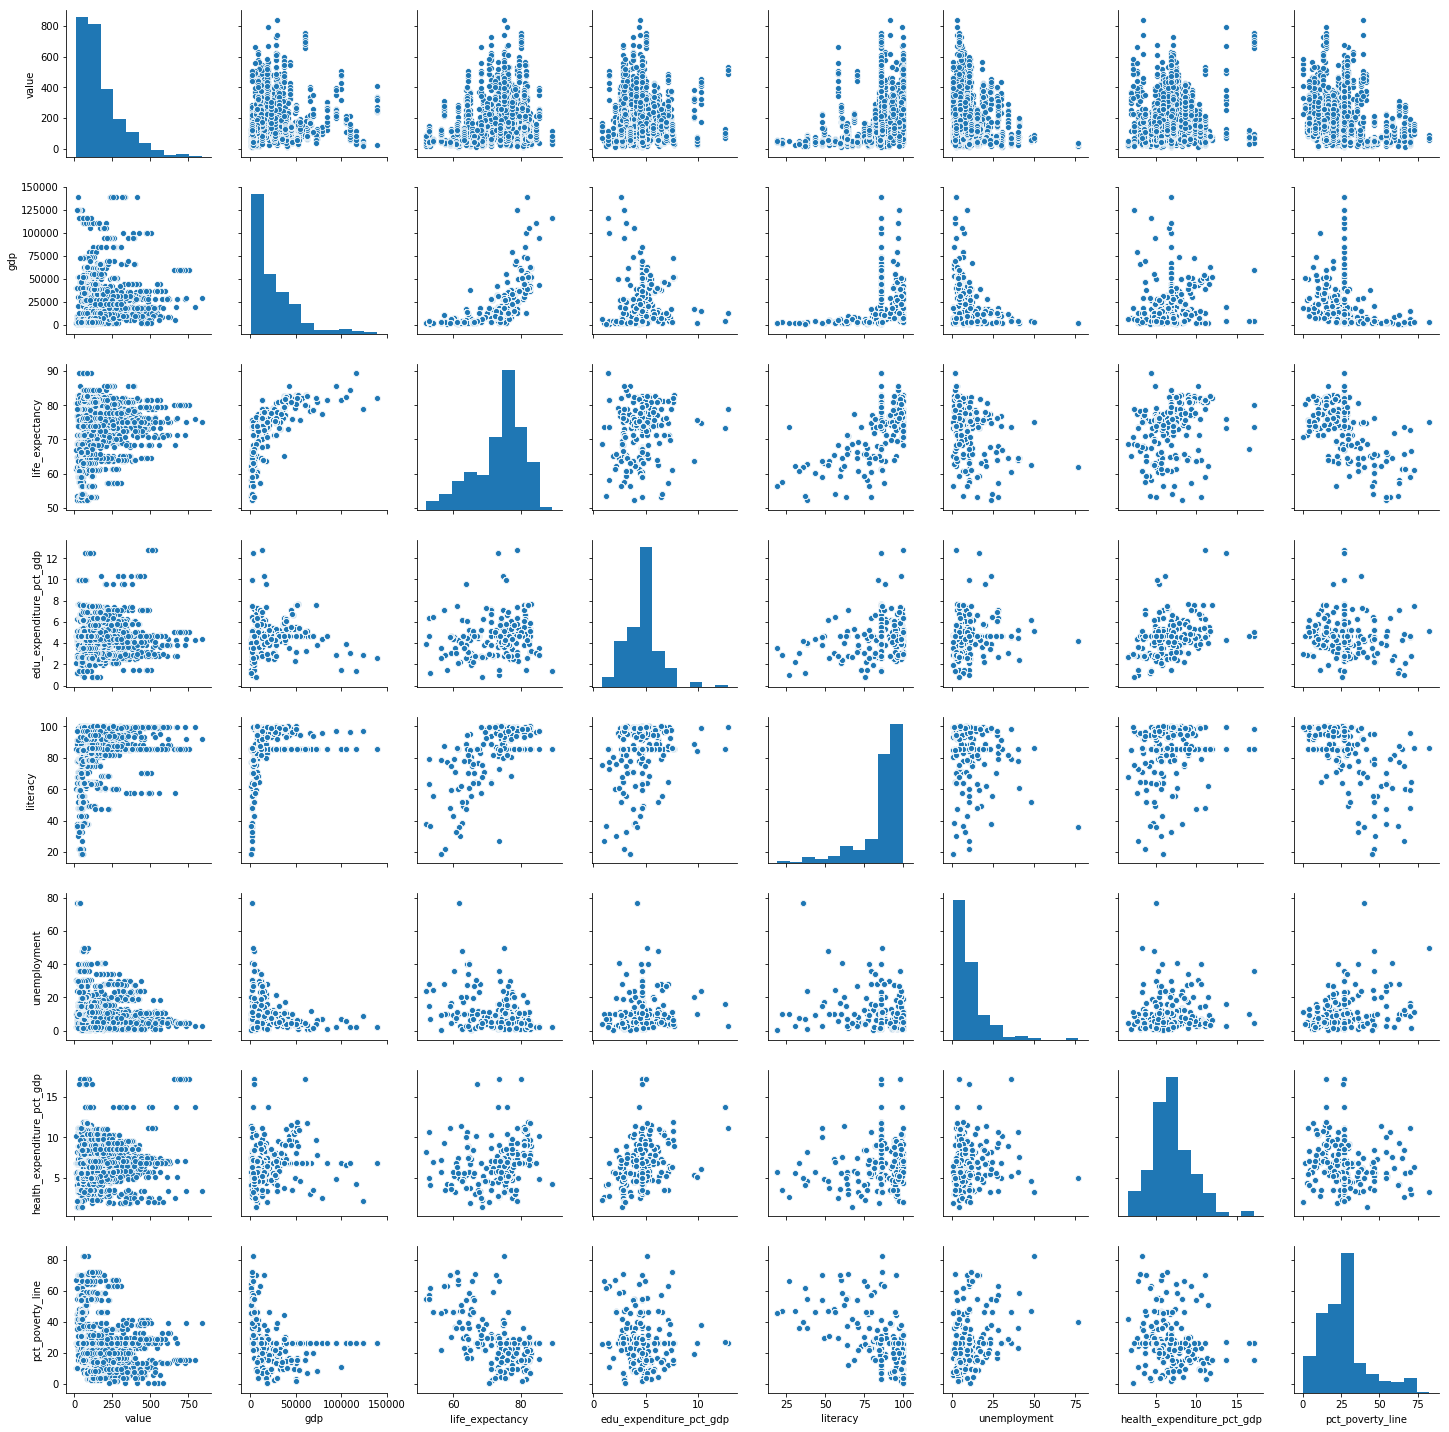

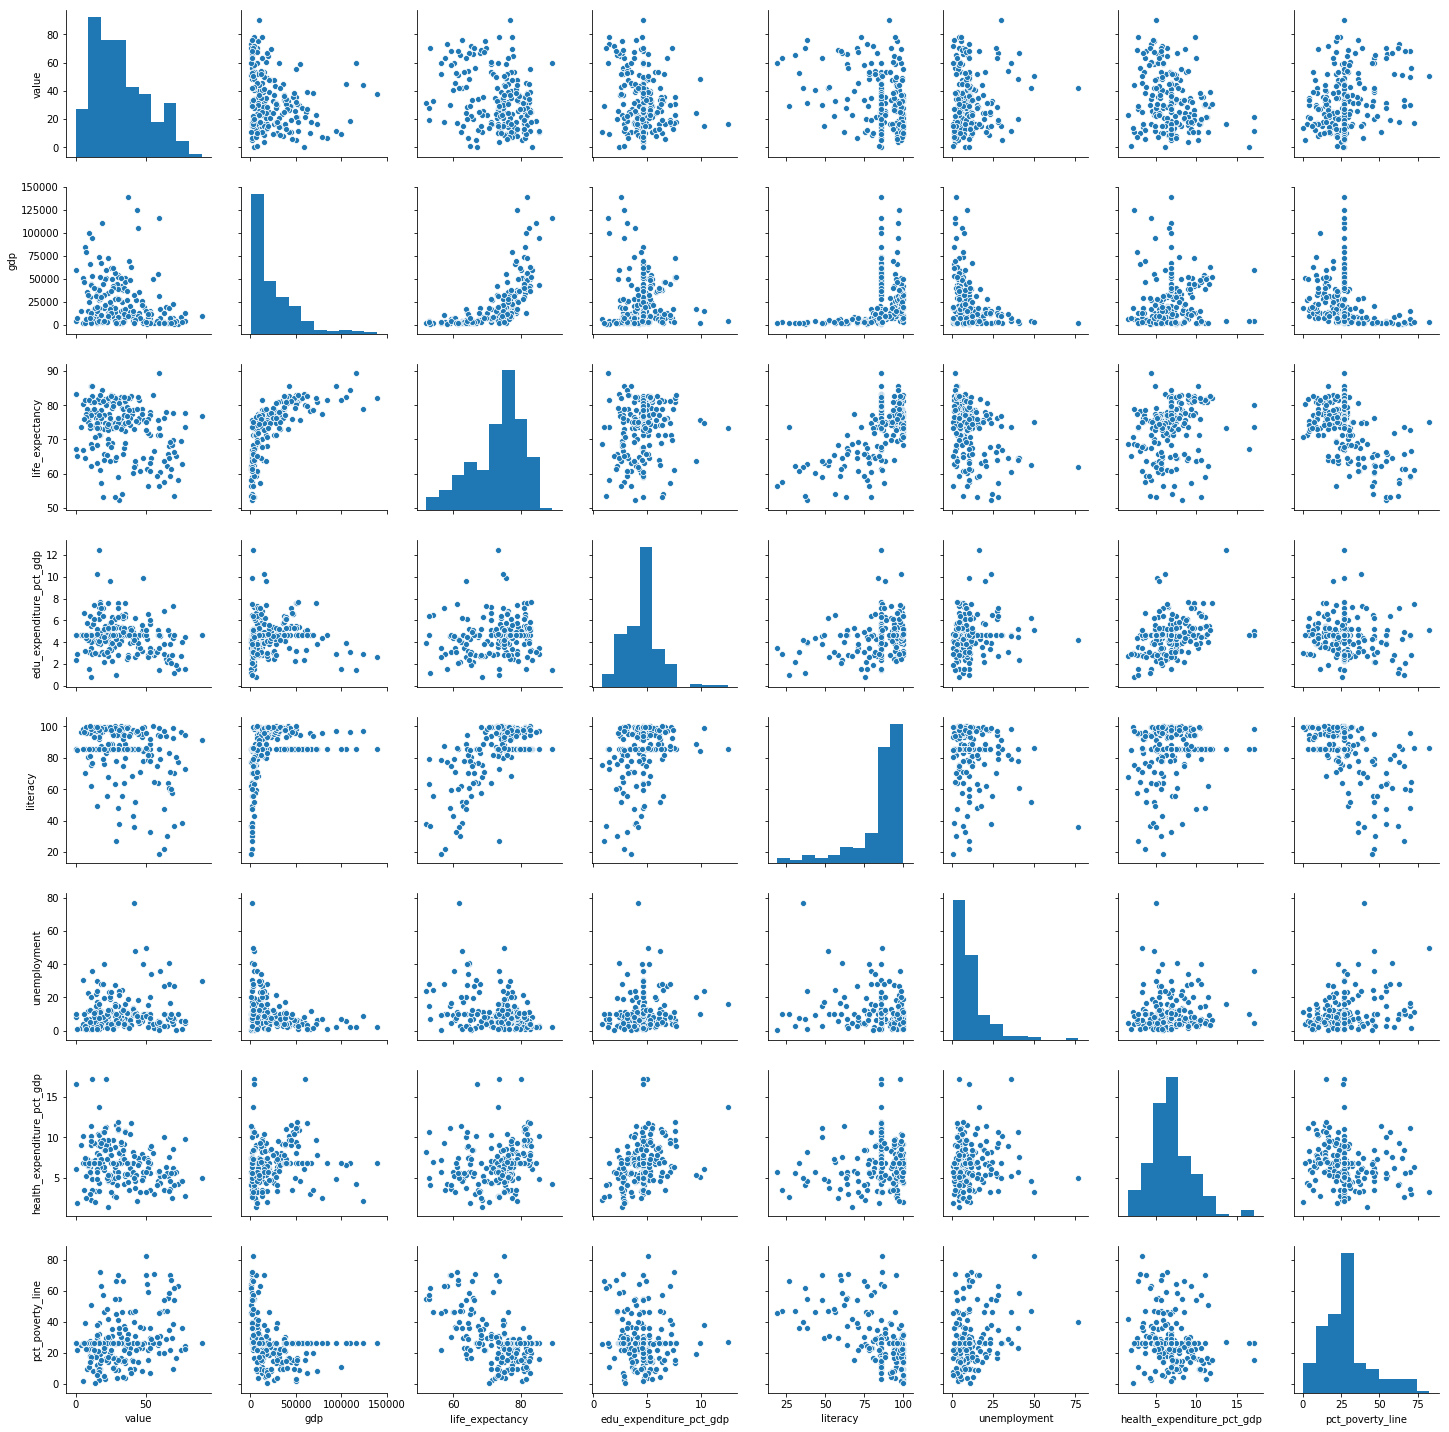

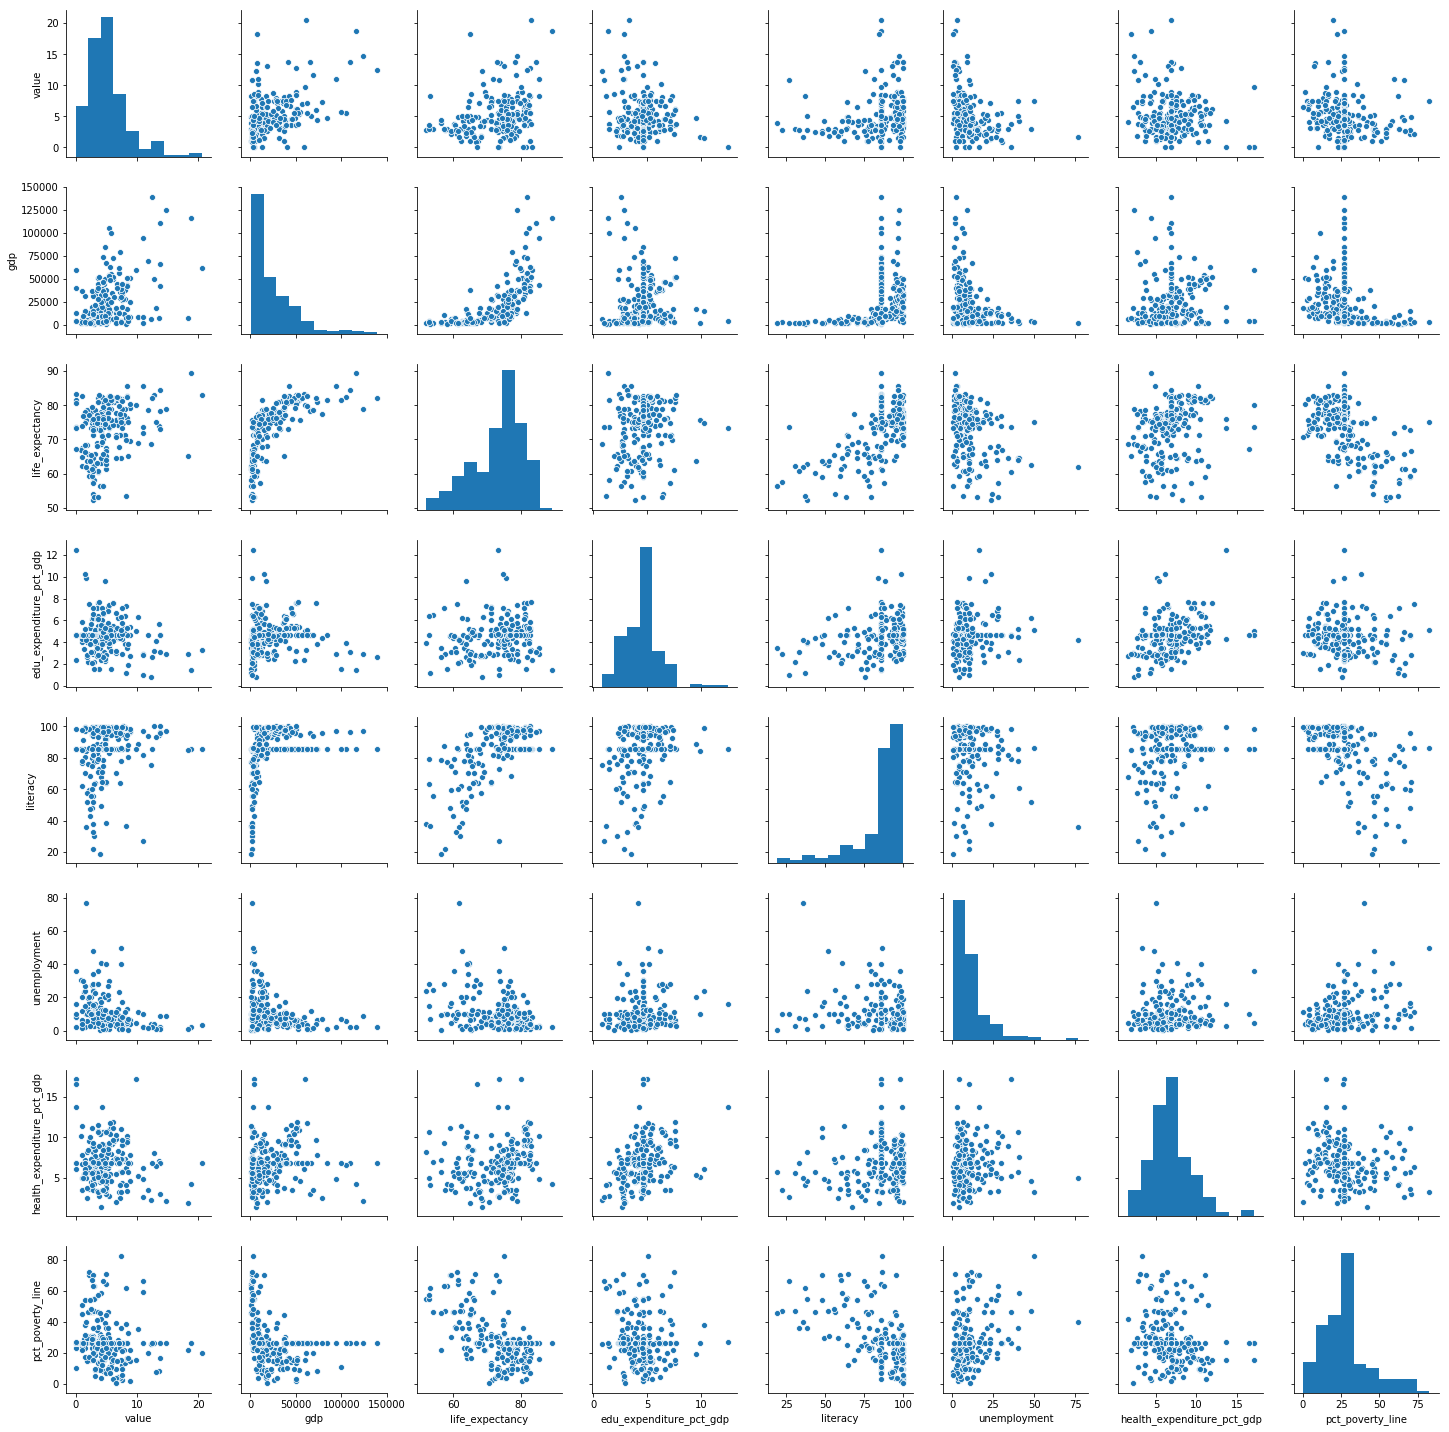

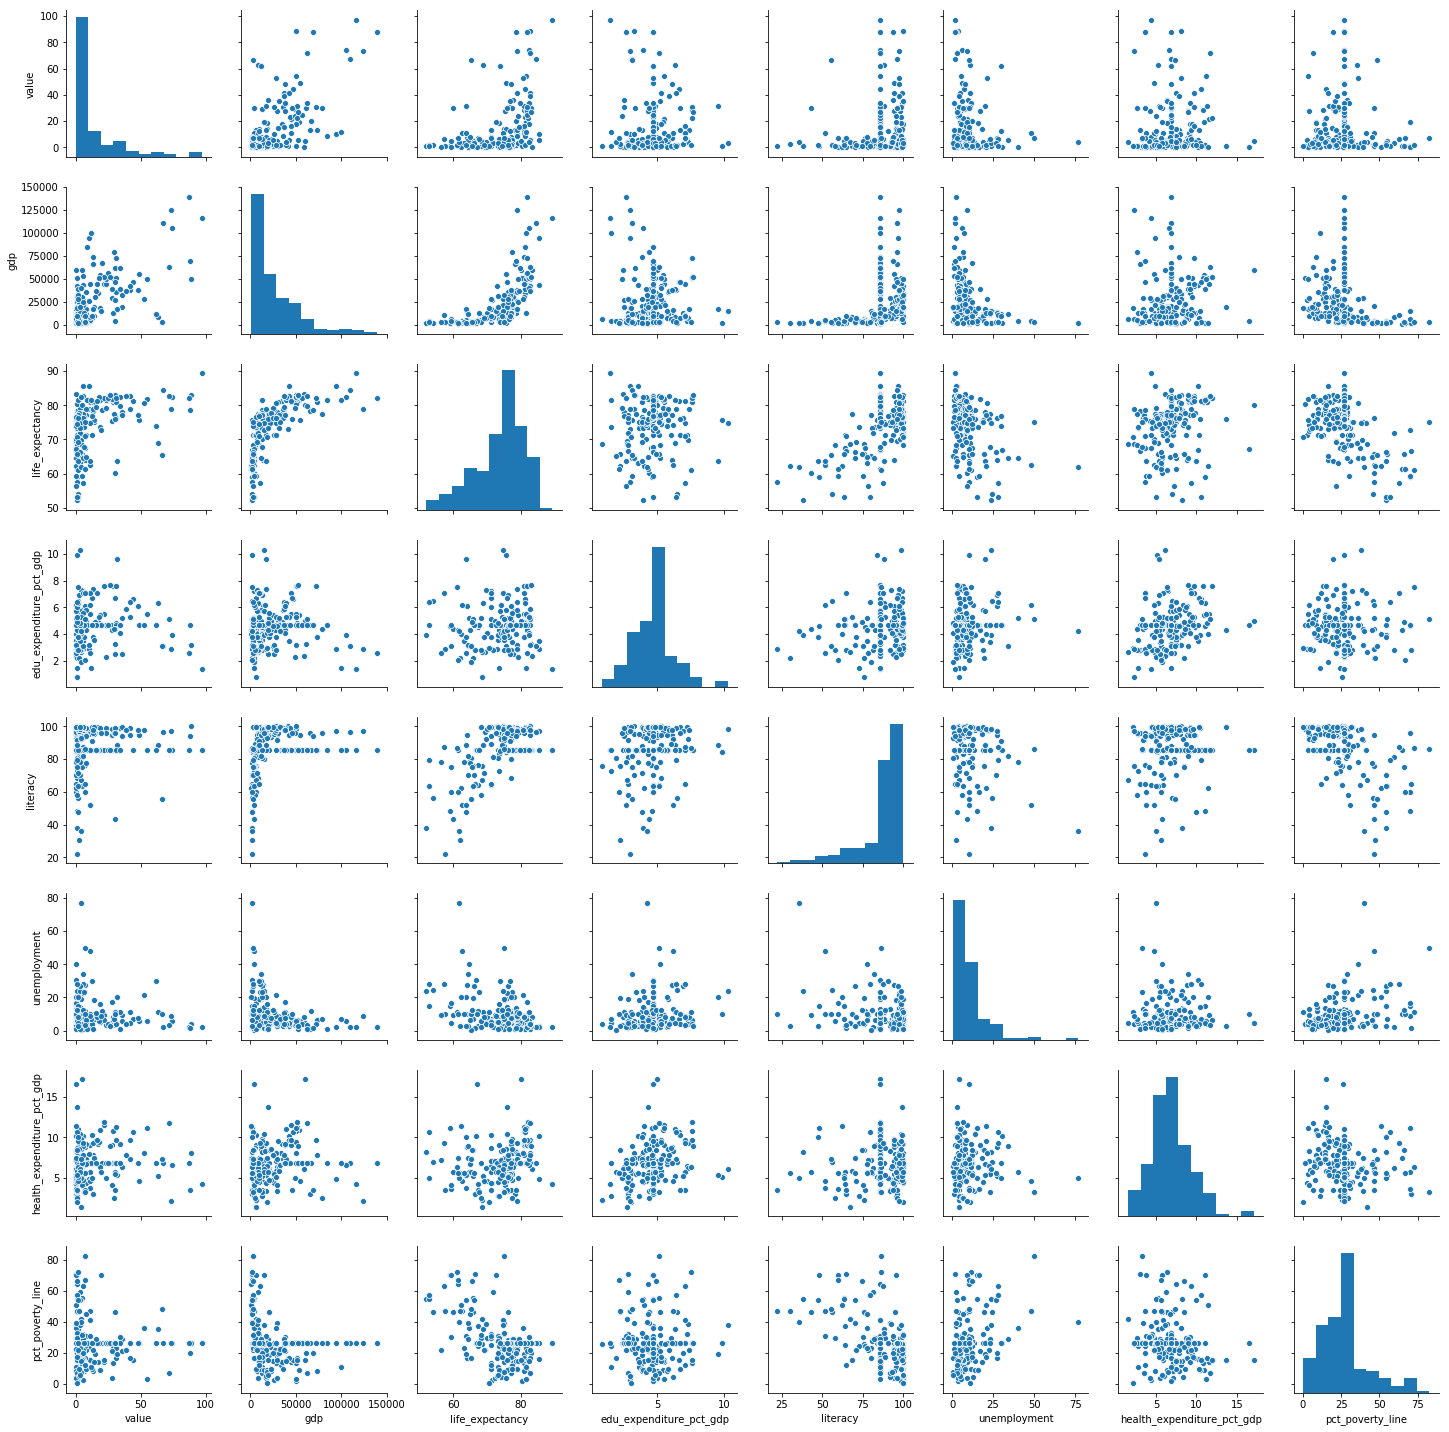

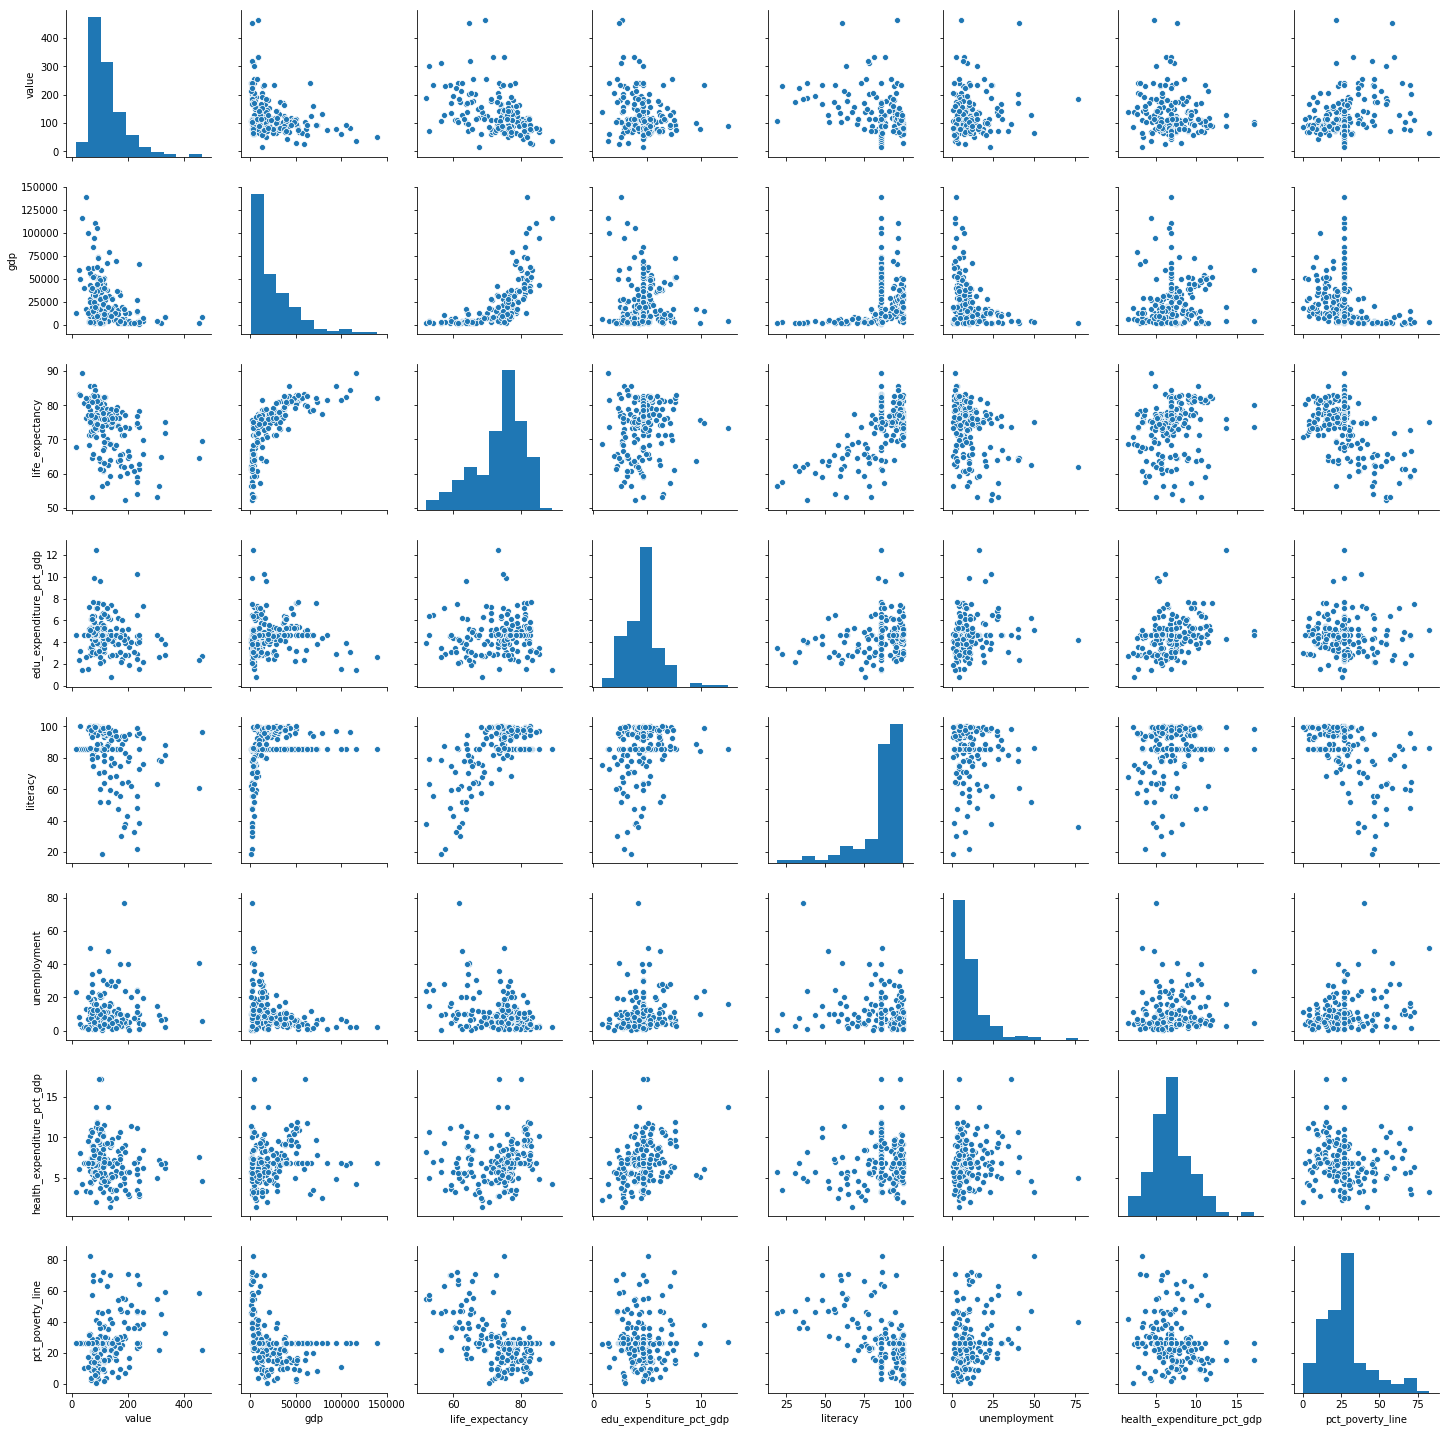

In [410]:
for df in metrics :
    sns.pairplot(df[columns].dropna(),  vars=columns)

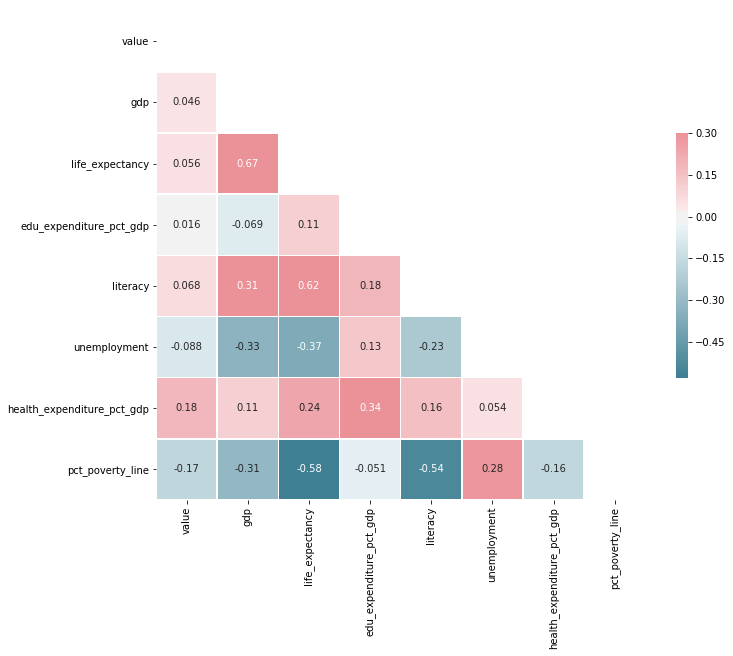

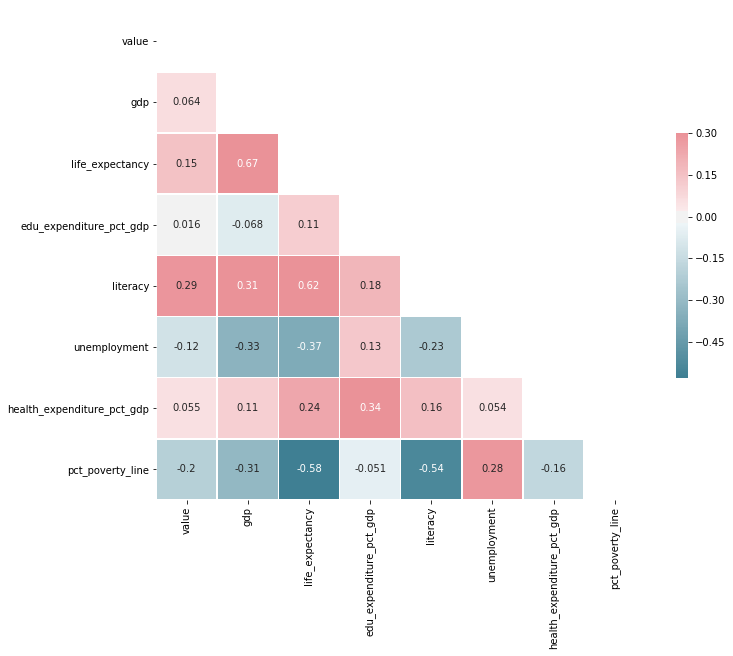

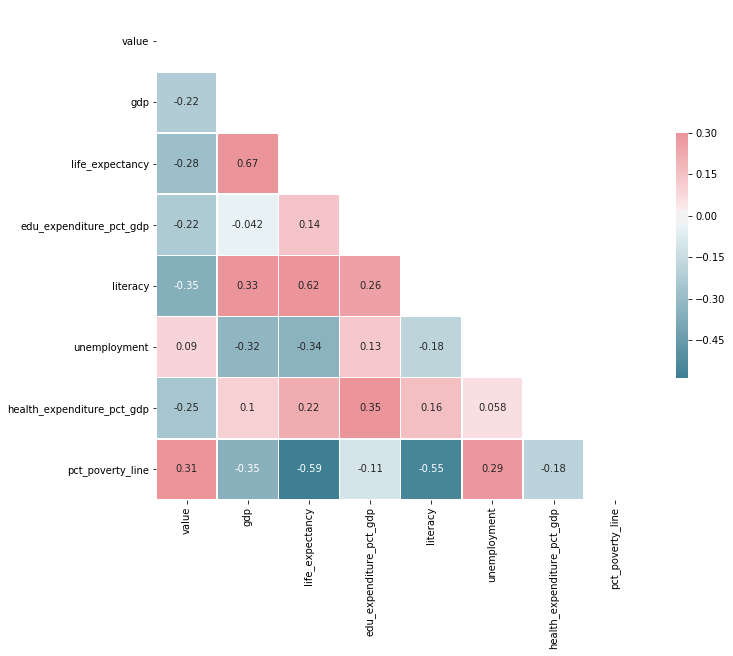

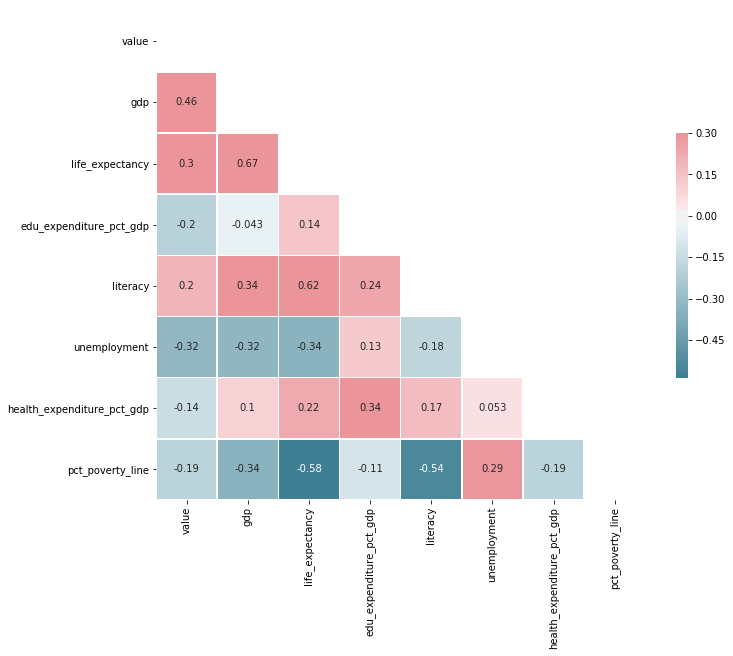

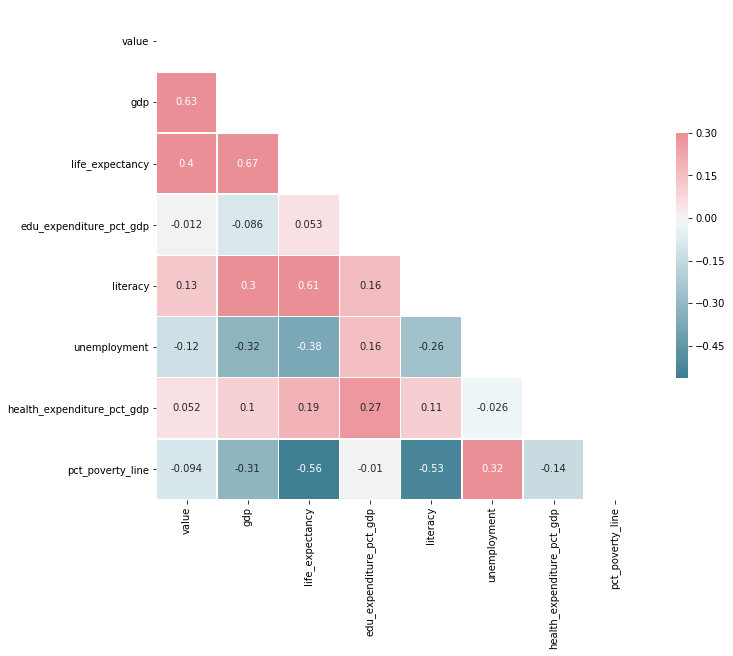

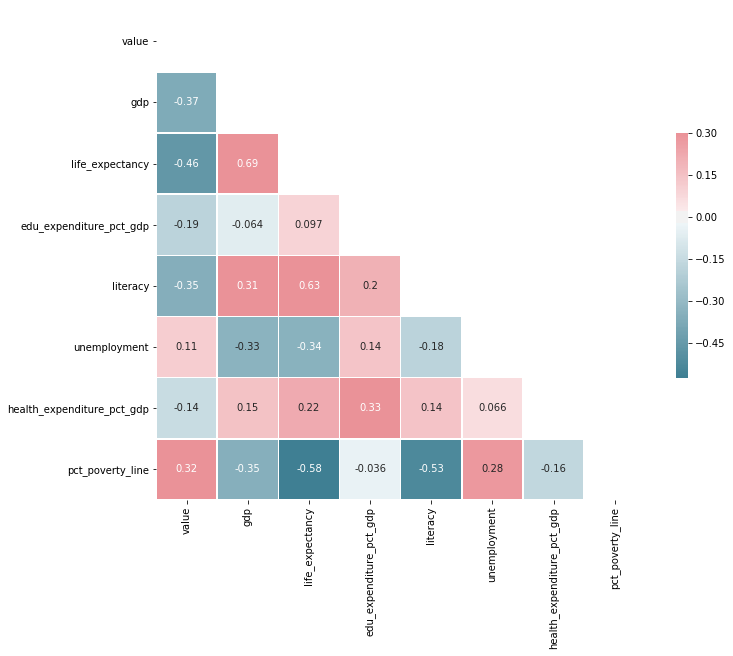

In [412]:
for df in metrics :
    
    # Compute the correlation matrix
    corr = df[columns].corr(method='pearson')

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Regression Modelling


In [413]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [414]:
def lin_reg_run(m, df):
    X = df[columns]
    Y = X['value']
    X = X.drop('value', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)
    
    #credit: https://www.kaggle.com/junkal/selecting-the-best-regression-model

    pipelines = []
    pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
    pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
    pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
    pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
    pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
    pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

    results = []
    names = []

    for name, model in pipelines:
        kfold = KFold(n_splits=10, random_state=21)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        
        print(msg)


In [415]:
lin_reg_run('ppt', ppt)

ScaledLR: -31369995399.914043 (22787727207.660973)
ScaledLASSO: -31369994679.111641 (22787915533.189129)
ScaledEN: -31548556917.734901 (23949022674.630085)
ScaledKNN: -2096856563.365924 (2703963818.066166)
ScaledCART: -836763146.613347 (541131096.713835)
ScaledGBM: -1149941077.464890 (587130697.738505)


In [416]:
#highest neg-MSE is the favourite

In [417]:
lin_reg_run('ppr', ppr)

ScaledLR: -16541.760806 (2846.031857)
ScaledLASSO: -16532.091718 (2845.322517)
ScaledEN: -16694.310589 (2792.192433)
ScaledKNN: -4520.863073 (1228.908974)
ScaledCART: -3749.740646 (824.933130)
ScaledGBM: -5888.659035 (848.494790)


In [418]:
lin_reg_run('remand', remand)

ScaledLR: -352.716308 (133.425332)
ScaledLASSO: -348.706903 (129.774870)
ScaledEN: -346.362008 (123.664843)
ScaledKNN: -414.140943 (169.695993)
ScaledCART: -659.979837 (190.697940)
ScaledGBM: -403.091958 (154.309646)


In [419]:
lin_reg_run('fem', fem)

ScaledLR: -8.709290 (4.054488)
ScaledLASSO: -9.888588 (3.778499)
ScaledEN: -9.299366 (3.762506)
ScaledKNN: -9.686317 (4.574132)
ScaledCART: -16.655752 (7.191225)
ScaledGBM: -8.592517 (3.697702)


In [420]:
lin_reg_run('foreign', foreign)

ScaledLR: -259.389833 (119.245545)
ScaledLASSO: -251.011779 (121.072746)
ScaledEN: -268.926973 (135.635399)
ScaledKNN: -286.663372 (122.119289)
ScaledCART: -674.375160 (346.485373)
ScaledGBM: -345.066988 (201.941505)


In [421]:
lin_reg_run('occ', occ)

ScaledLR: -3879.217610 (2435.591092)
ScaledLASSO: -3847.043434 (2481.384720)
ScaledEN: -3765.820951 (2620.378955)
ScaledKNN: -3904.029961 (2647.325150)
ScaledCART: -7078.268461 (4630.335236)
ScaledGBM: -4543.251843 (3023.232585)


In [422]:
from sklearn.metrics import mean_squared_error

def finalise_regressor_cart(m, df):
    X = df[columns]
    Y = X['value']
    X = X.drop('value', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)
    scaler = StandardScaler().fit(X_train)
    rescaled_X_train = scaler.transform(X_train)
    model = DecisionTreeRegressor()
    model.fit(rescaled_X_train, Y_train)

    # transform the validation dataset
    rescaled_X_test = scaler.transform(X_test)
    predictions = model.predict(rescaled_X_test)
    print (mean_squared_error(Y_test, predictions))
        
    compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
    print(compare.head(10))
    
    #credit https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
    df1 = compare.head(25)
    df1.plot(kind='bar',figsize=(16,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    
#    plt.scatter(X_train, Y_train,  color='gray')
 #   plt.plot(rescaled_X_test, predictions, color='red', linewidth=2)
  #  plt.show()

In [423]:


def finalise_regressor_lasso(m, df):
    X = df[columns]
    Y = X['value']
    X = X.drop('value', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)
    
    scaler = StandardScaler().fit(X_train)
    rescaled_X_train = scaler.transform(X_train)
    model = Lasso()
    model.fit(rescaled_X_train, Y_train)

    # transform the validation dataset
    rescaled_X_test = scaler.transform(X_test)
    predictions = model.predict(rescaled_X_test)
    print (mean_squared_error(Y_test, predictions))
    
    compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
    print(compare.head(10))
    
    #credit https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
    df1 = compare.head(25)
    df1.plot(kind='bar',figsize=(16,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()

1061786302.6697341
      Prediction   Test Data
1350   51136.833   54117.000
2719  165019.500  158165.000
1603   25571.600   24000.000
1925     621.889     393.000
2377   14930.667   10000.000
2785    3003.125    3610.000
2925 2180925.000 2258792.000
2052     568.375      81.000
1958    1608.444    2032.000
2300    2383.778    2200.000


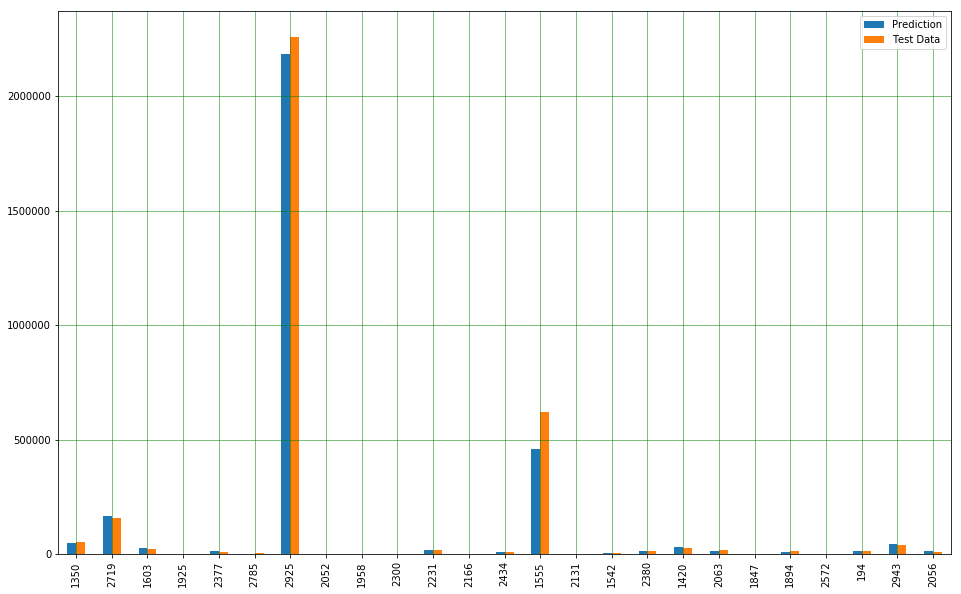

In [424]:
finalise_regressor_cart('ppt', ppt)

82656768127.92932
      Prediction   Test Data
1350   37374.975   54117.000
2719  100575.268  158165.000
1603   65900.439   24000.000
1925   53413.136     393.000
2377   47486.070   10000.000
2785   26496.134    3610.000
2925  190973.299 2258792.000
2052   89681.519      81.000
1958  -13713.476    2032.000
2300   54736.160    2200.000


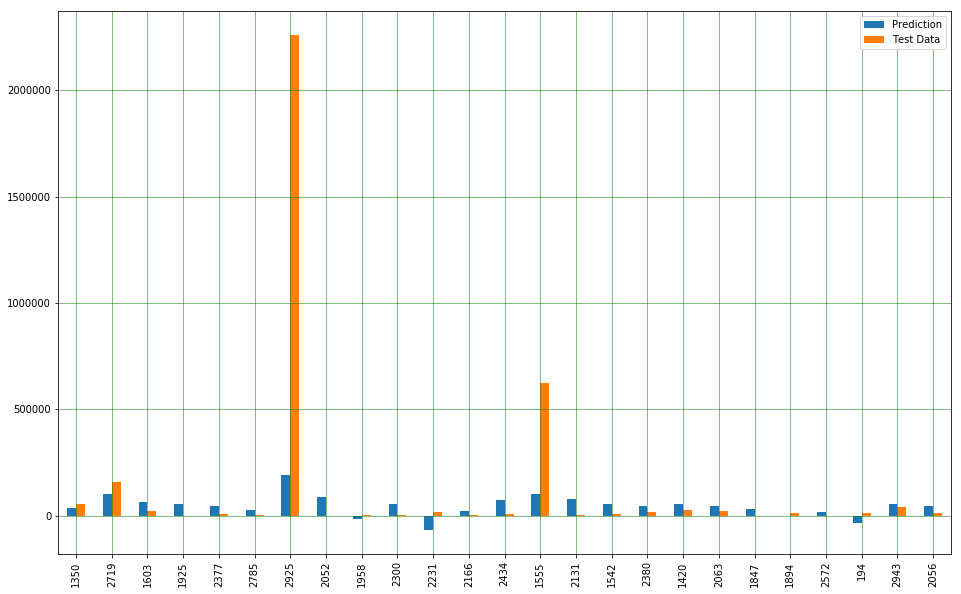

In [425]:
finalise_regressor_lasso('ppt', ppt)

3130.9277753476717
      Prediction  Test Data
3327     191.222    127.000
4105     180.857    198.000
3420     345.833    382.000
3994     187.143    177.000
3882     177.750    168.000
289      157.286    204.000
4009     228.125    193.000
3607      92.333     60.000
3702     175.667     26.000
3377     517.000    487.000


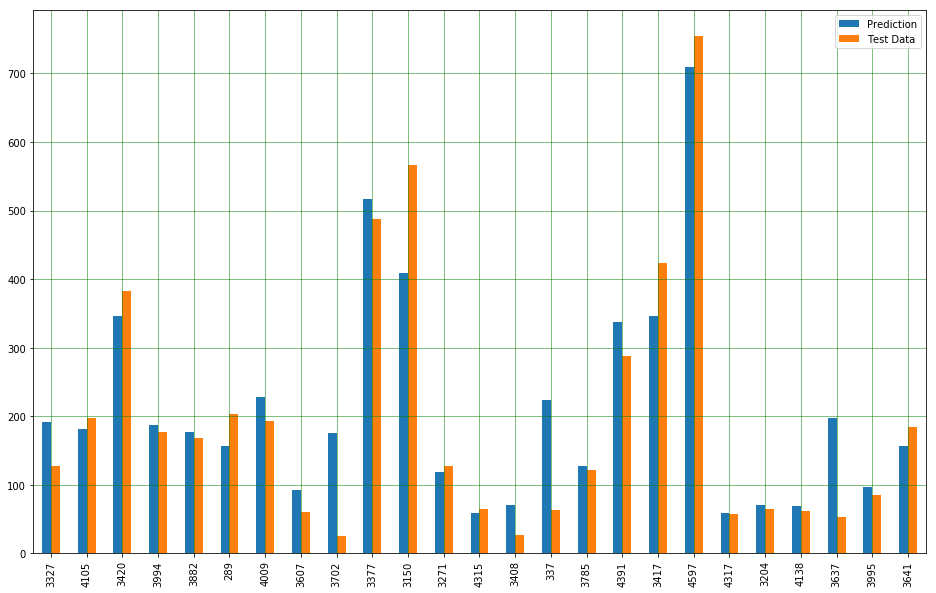

In [426]:
finalise_regressor_cart('ppr', ppr)

14846.385139521708
      Prediction  Test Data
3327     197.541    127.000
4105     165.691    198.000
3420     169.145    382.000
3994     188.212    177.000
3882     160.666    168.000
289      215.006    204.000
4009     221.352    193.000
3607     159.829     60.000
3702     180.081     26.000
3377     190.397    487.000


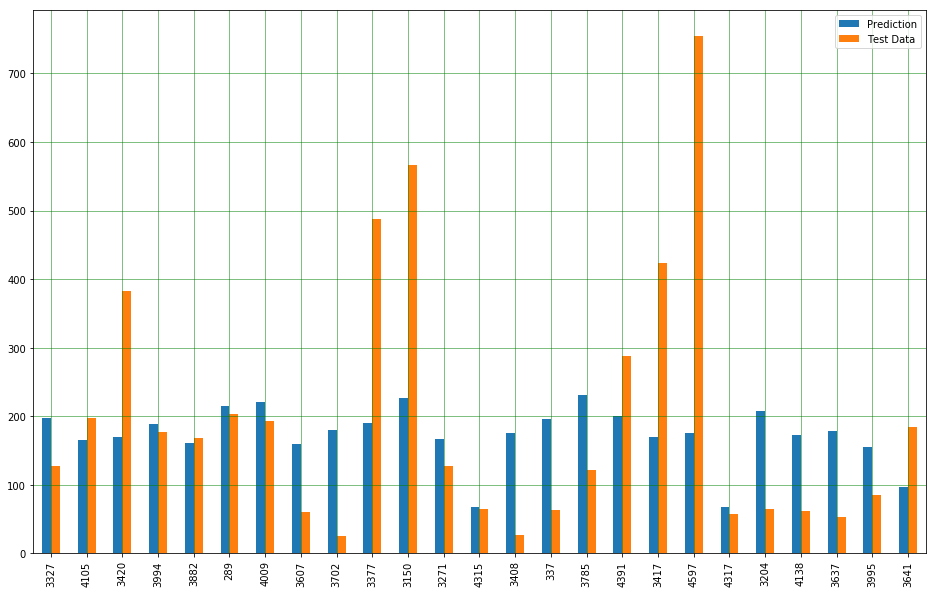

In [427]:
finalise_regressor_lasso('ppr', ppr)

500.88937500000003
     Prediction  Test Data
476      30.100     33.100
625      35.500     19.200
531      47.700     27.900
654      11.800     26.800
506       0.000     21.600
606       0.000      9.600
491      90.000     33.800
635      16.500      7.400
453      60.300     27.400
651      66.800     22.200


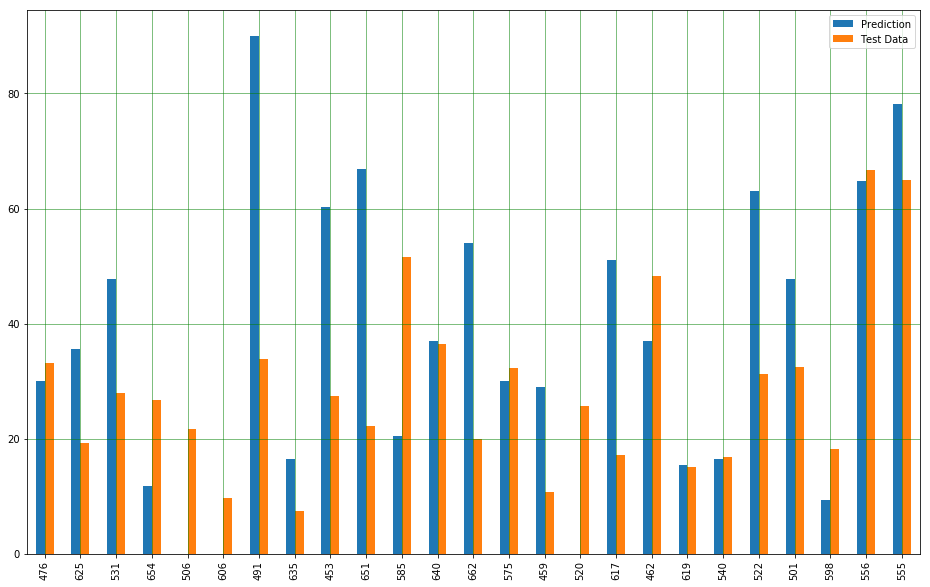

In [428]:
finalise_regressor_cart('remand', remand)


181.84772301019225
     Prediction  Test Data
476      40.360     33.100
625      26.113     19.200
531      29.356     27.900
654      30.781     26.800
506      20.003     21.600
606      30.664      9.600
491      25.155     33.800
635      31.437      7.400
453      33.613     27.400
651      44.808     22.200


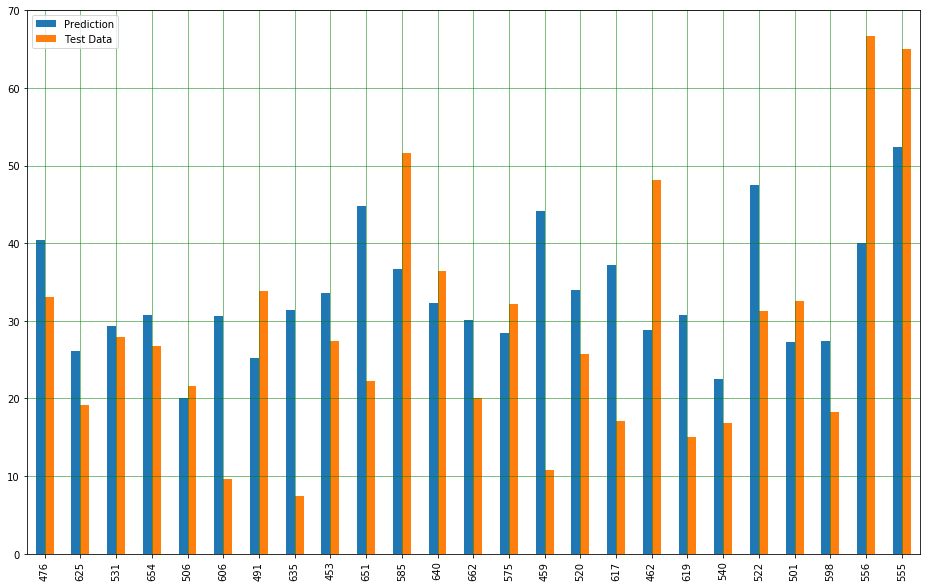

In [429]:
finalise_regressor_lasso('remand', remand)

376.2332142857143
      Prediction  Test Data
908       31.300     19.100
933        0.000     29.900
1071       5.500      4.100
1015       1.400     35.500
1062       5.700      2.000
904        0.400      1.900
913        2.900      3.800
961        1.200      3.800
1022      11.000      1.900
992        7.700      5.200


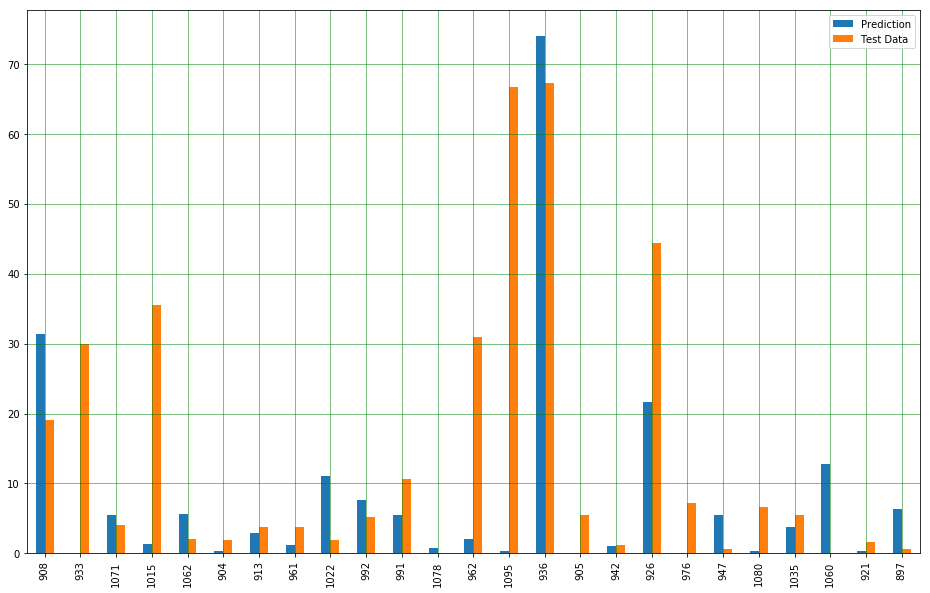

In [430]:
finalise_regressor_cart('foreign', foreign)

285.22317653784654
      Prediction  Test Data
908       26.149     19.100
933       29.617     29.900
1071       4.407      4.100
1015      16.153     35.500
1062       7.759      2.000
904        7.787      1.900
913        7.318      3.800
961        4.480      3.800
1022      19.609      1.900
992        2.888      5.200


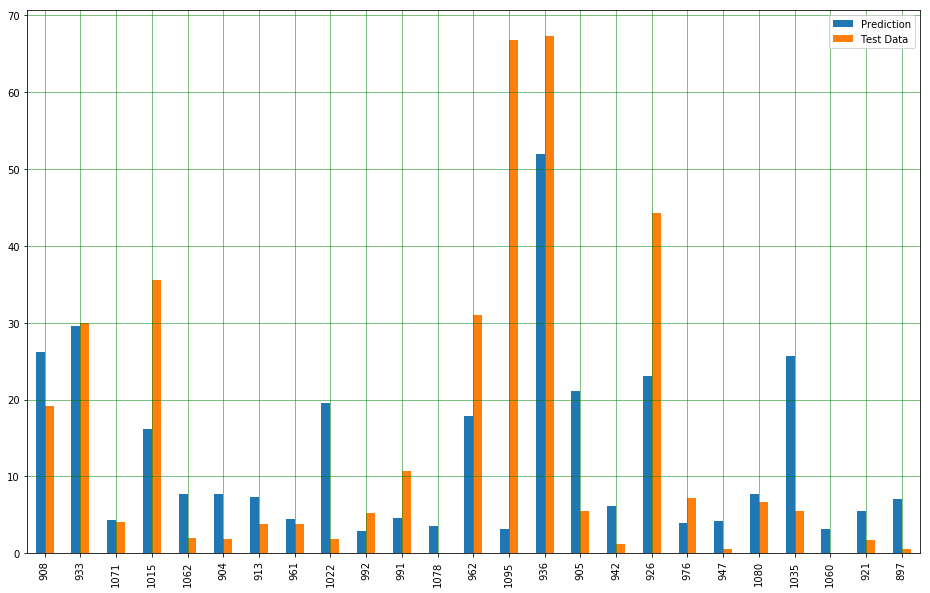

In [431]:
finalise_regressor_lasso('foreign', foreign)

11.911349484923184
     Prediction  Test Data
675       5.057      5.500
871       4.881      3.600
734       4.887      0.000
863       5.542      3.500
786       5.443      3.100
779       4.859      4.200
681       4.939     12.300
754       4.908      1.100
743       5.066      4.900
815       5.354      5.200


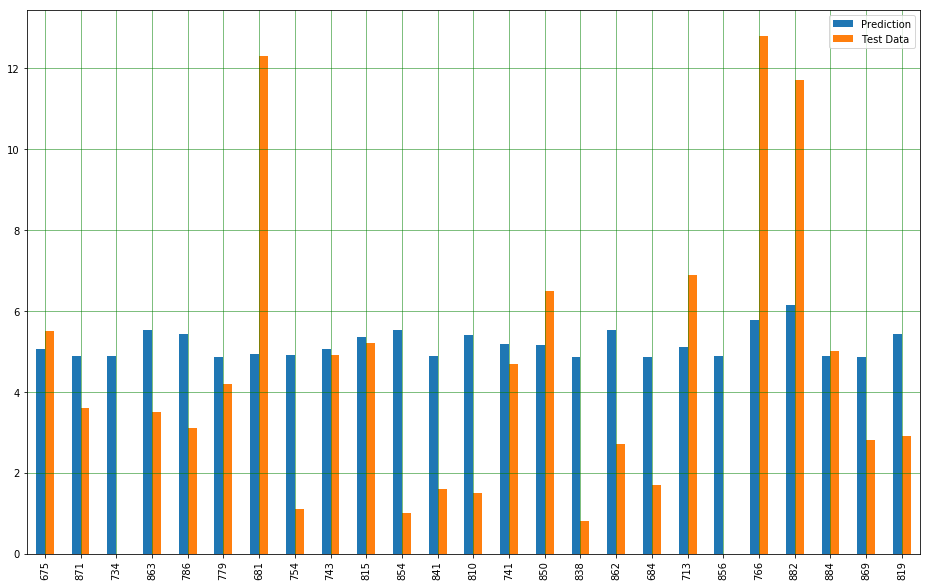

In [432]:
finalise_regressor_lasso('fem',fem )

17.706015625
     Prediction  Test Data
675       4.300      5.500
871       4.400      3.600
734       6.850      0.000
863       8.100      3.500
786       7.700      3.100
779       2.100      4.200
681       3.800     12.300
754       1.800      1.100
743       3.600      4.900
815       4.300      5.200


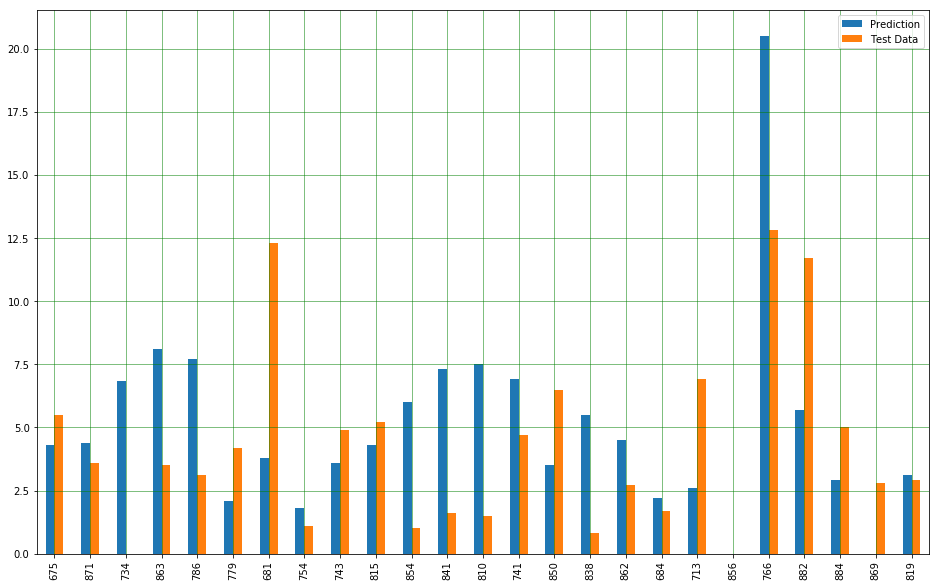

In [433]:
finalise_regressor_cart('fem', fem)

3037.3359256180743
      Prediction  Test Data
1265      66.731     92.100
1236     103.575    118.900
1126     133.213    231.500
1190     120.322     63.900
1280     166.784    318.300
1318     134.707    144.000
1184     115.642    170.200
1168     136.635     73.000
1128      96.636     77.700
1296     175.781     95.600


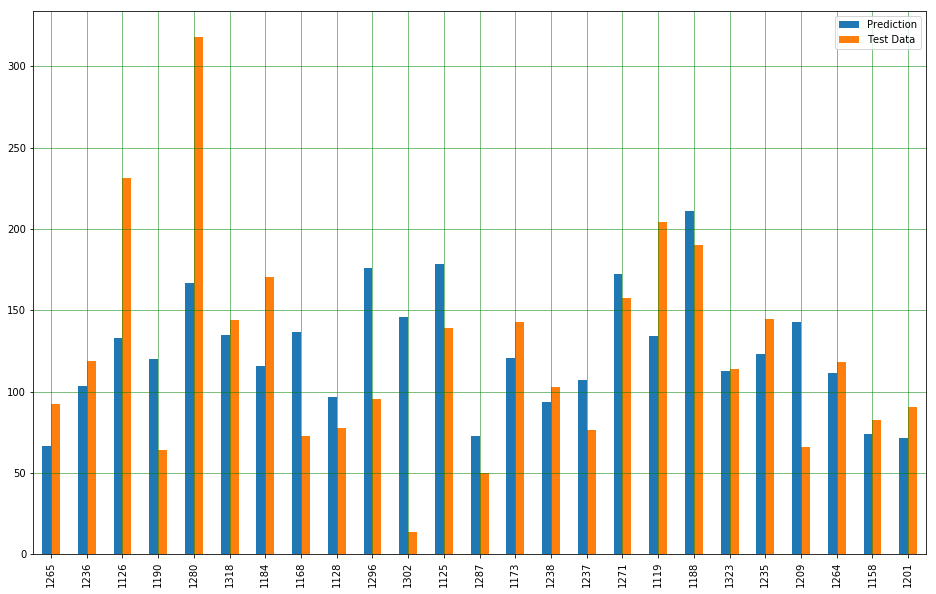

In [434]:
finalise_regressor_lasso('occ', occ)

4877.44775
      Prediction  Test Data
1265      64.000     92.100
1236      90.100    118.900
1126     184.900    231.500
1190     126.250     63.900
1280     121.200    318.300
1318     190.600    144.000
1184      89.300    170.200
1168      50.000     73.000
1128      88.000     77.700
1296     172.500     95.600


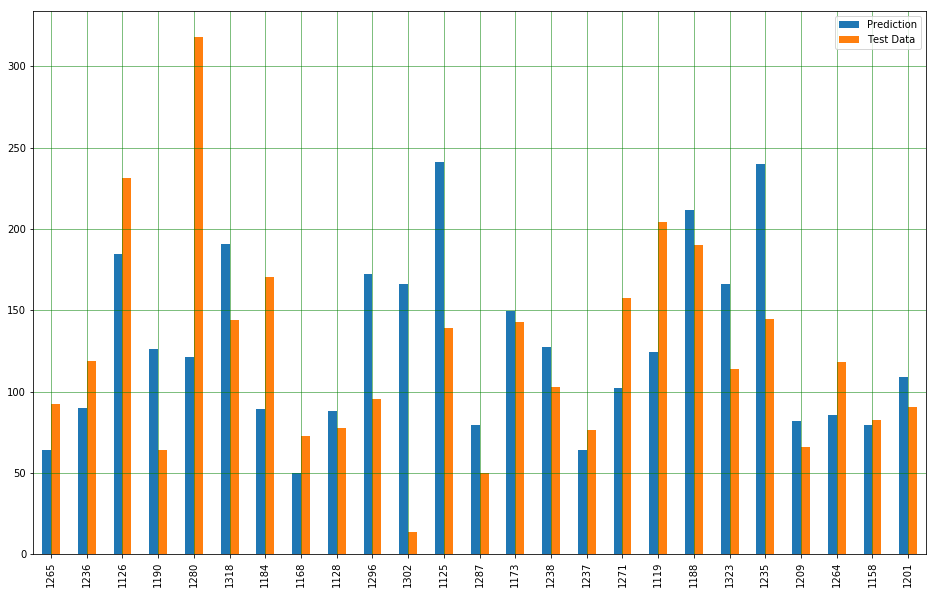

In [435]:
finalise_regressor_cart('occ', occ)

### Population rate and total perform much better with the CART model, whereas the other rate (percentage) metrics appear to do better with lasso. 

In [436]:
from sklearn.metrics import mean_squared_error

def return_expected_values(m, df, coeff=False):
    X = df[columns]
    Y = X['value']
    X = X.drop('value', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)
    scaler = StandardScaler().fit(X_train)
    rescaled_X_train = scaler.transform(X_train)
    model = m
    model.fit(rescaled_X_train, Y_train)

    # transform the validation dataset
    rescaled_X_test = scaler.transform(X_test)
    predictions = model.predict(rescaled_X_test)
    mse = mean_squared_error(Y_test, predictions)
    
    rescaled_X = scaler.transform(X)
    predictions_X = model.predict(rescaled_X)
    
    
    df['exp_value'] = predictions_X

    if coeff:
        coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
        coeff_df
    else:
        coeff_df = 'N/A'
    
    return {'mean_se' : mse, 'coeff' : coeff_df, 'df' : df}

In [437]:
return_expected_values(DecisionTreeRegressor(), fem)

{'mean_se': 12.70982558139535,
 'coeff': 'N/A',
 'df':      id_x  countryref_id                          country  metric_id  \
 666   679            160                 Papua New Guinea          4   
 667   680            181                         Slovakia          4   
 668   681            104                       Kyrgyzstan          4   
 669   682            113                       Kazakhstan          4   
 670   683             43                         Colombia          4   
 671   684            125                          Morocco          4   
 672   685             68  United Kingdom: England & Wales          4   
 673   686            172               Russian Federation          4   
 674   687            163                           Poland          4   
 675   688             90                        Indonesia          4   
 676   689            159        French Polynesia (France)          4   
 677   690             66                           France          4 

In [438]:
return_expected_values(Lasso(), fem, coeff = True)

{'mean_se': 13.827815209556347,
 'coeff':                             Coefficient
 gdp                               0.271
 life_expectancy                   0.000
 edu_expenditure_pct_gdp          -0.000
 literacy                          0.000
 unemployment                     -0.000
 health_expenditure_pct_gdp       -0.000
 pct_poverty_line                 -0.000,
 'df':      id_x  countryref_id                          country  metric_id  \
 666   679            160                 Papua New Guinea          4   
 667   680            181                         Slovakia          4   
 668   681            104                       Kyrgyzstan          4   
 669   682            113                       Kazakhstan          4   
 670   683             43                         Colombia          4   
 671   684            125                          Morocco          4   
 672   685             68  United Kingdom: England & Wales          4   
 673   686            172               

In [439]:
return_expected_values(Lasso(), foreign, coeff = True)

{'mean_se': 247.5382030493588, 'coeff':                             Coefficient
 gdp                              12.070
 life_expectancy                   0.000
 edu_expenditure_pct_gdp           0.157
 literacy                         -0.000
 unemployment                      0.176
 health_expenditure_pct_gdp       -0.000
 pct_poverty_line                  0.313, 'df':       id_x  countryref_id                          country  metric_id  \
 888    905            160                 Papua New Guinea          5   
 889    906            181                         Slovakia          5   
 890    907            104                       Kyrgyzstan          5   
 891    908            113                       Kazakhstan          5   
 892    909             43                         Colombia          5   
 893    910            125                          Morocco          5   
 894    911             68  United Kingdom: England & Wales          5   
 895    912            172         